In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Data

In [2]:
from kerasy.utils import generateWholeCakes

In [3]:
seed = 1
N = 200
K = 3
r_low, r_high = 2,5
rmin,rmax = -r_high, r_high

In [4]:
X,Y = np.meshgrid(np.linspace(rmin,rmax,100), np.linspace(rmin,rmax,100))
XY = np.c_[X.ravel(),Y.ravel()]

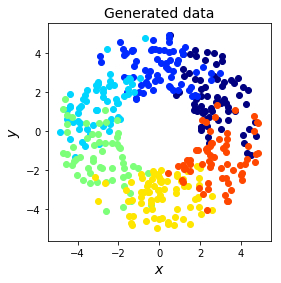

In [5]:
train_x, train_y = generateWholeCakes(K*2, N*2, r_low=r_low, r_high=r_high, seed=seed, same=False, plot=True, figsize=(4,4), noise_scale=2)

In [6]:
mask = (train_y%2)==0
train_x = train_x[mask]
train_y = train_y[mask]

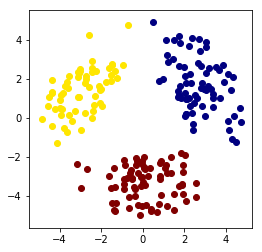

In [7]:
plt.figure(figsize=(4,4))
for i,(x,y) in enumerate(train_x):
    plt.scatter(x, y, color=cm.jet(train_y[i]/K))

## KMeans

In [8]:
from kerasy.ML.EM import KMeans

KMeans Lloyd 11/20 [###########---------]  55.00% - 0.002s  average inertia: 1.161, center shift total: 0.0001

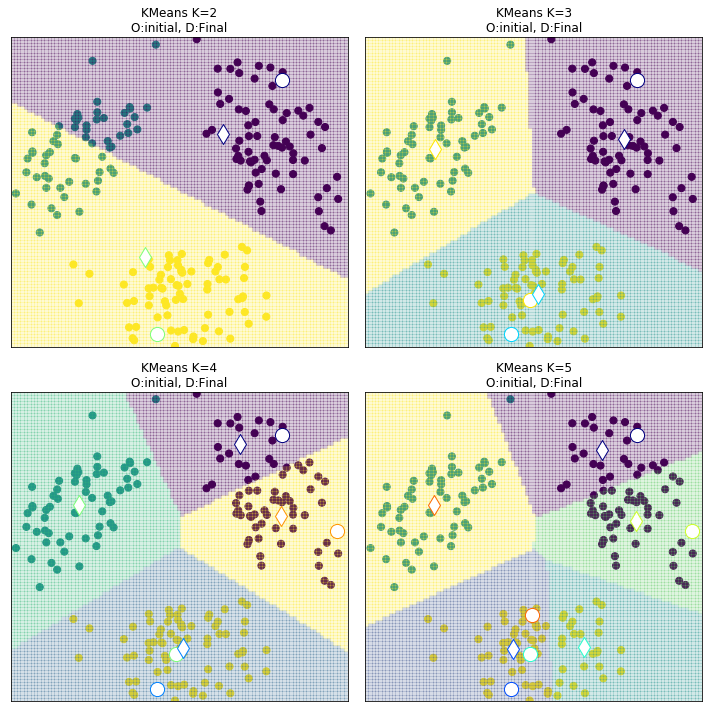

In [9]:
fig = plt.figure(figsize=(10,10))
for i, K in enumerate([2,3,4,5]):
    ax = fig.add_subplot(2,2,i+1)
    # Change the depth to fit the data.
    model = KMeans(n_clusters=K, random_state=seed)
    model.fit(train_x, memorize=True, max_iter=20)
    Z = model.predict(XY).reshape(X.shape)
    ax.scatter(train_x[:,0], train_x[:,1], c=train_y, s=50)
    ax.pcolor(X,Y,Z,alpha=0.2)
    # Initial µs.
    for i,(x,y) in enumerate(model.history[0][0]):  ax.scatter(x,y,s=200, edgecolors=cm.jet(i/K), facecolor="white", marker="o")
    # Final µs.olor
    for i,(x,y) in enumerate(model.history[-1][0]): ax.scatter(x,y,s=200, edgecolors=cm.jet(i/K), facecolor="white", marker="d")
    ax.set_title(f"KMeans K={K}\nO:initial, D:Final"), ax.set_xlim(rmin,rmax), ax.set_ylim(rmin,rmax)
    ax.set_xticks([]), ax.set_yticks([])
plt.tight_layout()
plt.show()

## Gaussian Mixture model

In [10]:
from kerasy.ML.EM import MixedGaussian

034/250 [##------------------]  13.60% - 0.056s  Log Likelihood: -908.1019037353917
017/250 [#-------------------]   6.80% - 0.041s  Log Likelihood: -832.9609379536007
074/250 [#####---------------]  29.60% - 0.283s  Log Likelihood: -828.2821123224742
074/250 [#####---------------]  29.60% - 0.262s  Log Likelihood: -819.1584393860112


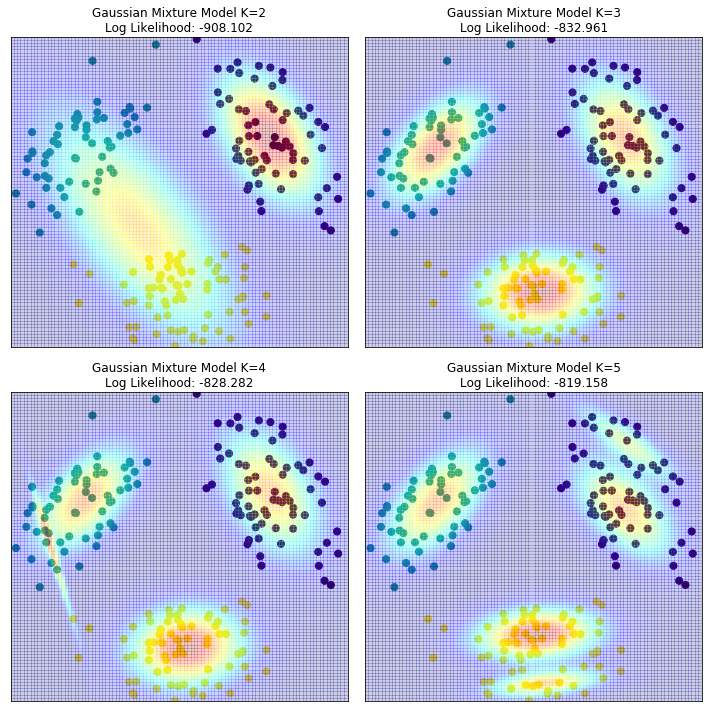

In [11]:
fig = plt.figure(figsize=(10,10))
for i, K in enumerate([2,3,4,5]):
    ax = fig.add_subplot(2,2,i+1)
    # Change the depth to fit the data.
    model = MixedGaussian(n_clusters=K, random_state=seed)
    model.fit(train_x, max_iter=250)
    Z = np.sum(model.Estep(XY, normalized=False), axis=1).reshape(X.shape)
    ax.scatter(train_x[:,0], train_x[:,1], c=train_y, s=50)
    ax.pcolor(X,Y,Z,alpha=0.2,cmap="jet")
    ax.set_title(f"Gaussian Mixture Model K={K}\nLog Likelihood: {model.loglikelihood(train_x):.3f}"), ax.set_xlim(rmin,rmax), ax.set_ylim(rmin,rmax)
    ax.set_xticks([]), ax.set_yticks([])
plt.tight_layout()
plt.show()